# SKT 이동통신사 유저의 배달음식 전화량

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams

def set_korea_font():
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    rcParams.update({'font.size': 11})
    rcParams['axes.unicode_minus'] = False  
set_korea_font()
%matplotlib inline

In [3]:
data = pd.read_csv('modeldata.csv')

data['날짜'] = pd.to_datetime(data['날짜'])
data = data.set_index('날짜')

In [4]:
data['active user'] = data['누적 가입자수'] - data['누적 이탈자수']

In [5]:
data['skt'] = data.index.year
data['skt'].replace([2013,2014,2015,2016,2017,2018,2019],[0.481,0.462,0.445,0.436,0.427,0.419,0.414], inplace=True)

In [6]:
data['skt'].unique()

array([0.481, 0.462, 0.445, 0.436, 0.427, 0.419, 0.414])

In [8]:
data['족발/보쌈'] = (data['족발/보쌈'] / data['skt']).astype(int)
data['중국음식'] = (data['중국음식'] / data['skt']).astype(int)
data['치킨'] = (data['치킨'] / data['skt']).astype(int)
data['피자'] = (data['피자'] / data['skt']).astype(int)

In [9]:
data.head()

,Unnamed: 0,족발/보쌈,중국음식,치킨,피자,일강수량(mm),컵라면,김밥,도시락,총 주문금액,누적 가입자수,누적 이탈자수,active user,skt
날짜,,,,,,,,,,,,,,
2013-08-01,0,6214,60935,45542,13771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.481
2013-08-02,1,7045,62783,57083,16821,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.481
2013-08-03,2,8180,74771,68573,19960,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.481
2013-08-04,3,7654,75299,66228,21869,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.481
2013-08-05,4,5498,57299,40875,13135,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.481


In [10]:
group = data.groupby(pd.Grouper(freq="M"))
monthly = group.sum()

In [11]:
monthly['1인 당 주문금액'] = monthly['총 주문금액'] / monthly['active user']

In [12]:
monthly.head()

,Unnamed: 0,족발/보쌈,중국음식,치킨,피자,일강수량(mm),컵라면,김밥,도시락,총 주문금액,누적 가입자수,누적 이탈자수,active user,skt,1인 당 주문금액
날짜,,,,,,,,,,,,,,,
2013-08-31,465,205537,1940932,1639346,513625,148.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.911,NaN
2013-09-30,1365,0,0,0,0,138.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.430,NaN
2013-10-31,2356,161004,1162869,1283244,370720,13.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.911,NaN
2013-11-30,3195,166222,1188780,1300163,394486,46.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.430,NaN
2013-12-31,4247,193487,1266623,1484809,487330,24.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.911,NaN


### 빈 data 메꾸기

In [13]:
day1309 = pd.read_csv('CALL_NDELIVERY_13_09.csv')
day1501 = pd.read_csv('CALL_NDELIVERY_15_01.csv')

In [14]:
day1309_ = day1309.groupby('업종').sum()['총_건수'] / 0.481
day1501_ = day1501.groupby('업종').sum()['통화량'] / 0.445

In [15]:
monthly.iloc[1,1] = day1309_[0]
monthly.iloc[1,2] = day1309_[1]
monthly.iloc[1,3] = day1309_[2]
monthly.iloc[1,4] = day1309_[3]

monthly.iloc[17,1] = day1501_[0]
monthly.iloc[17,2] = day1501_[1]
monthly.iloc[17,3] = day1501_[2]
monthly.iloc[17,4] = day1501_[3]

### 배달음식의 변화 양상

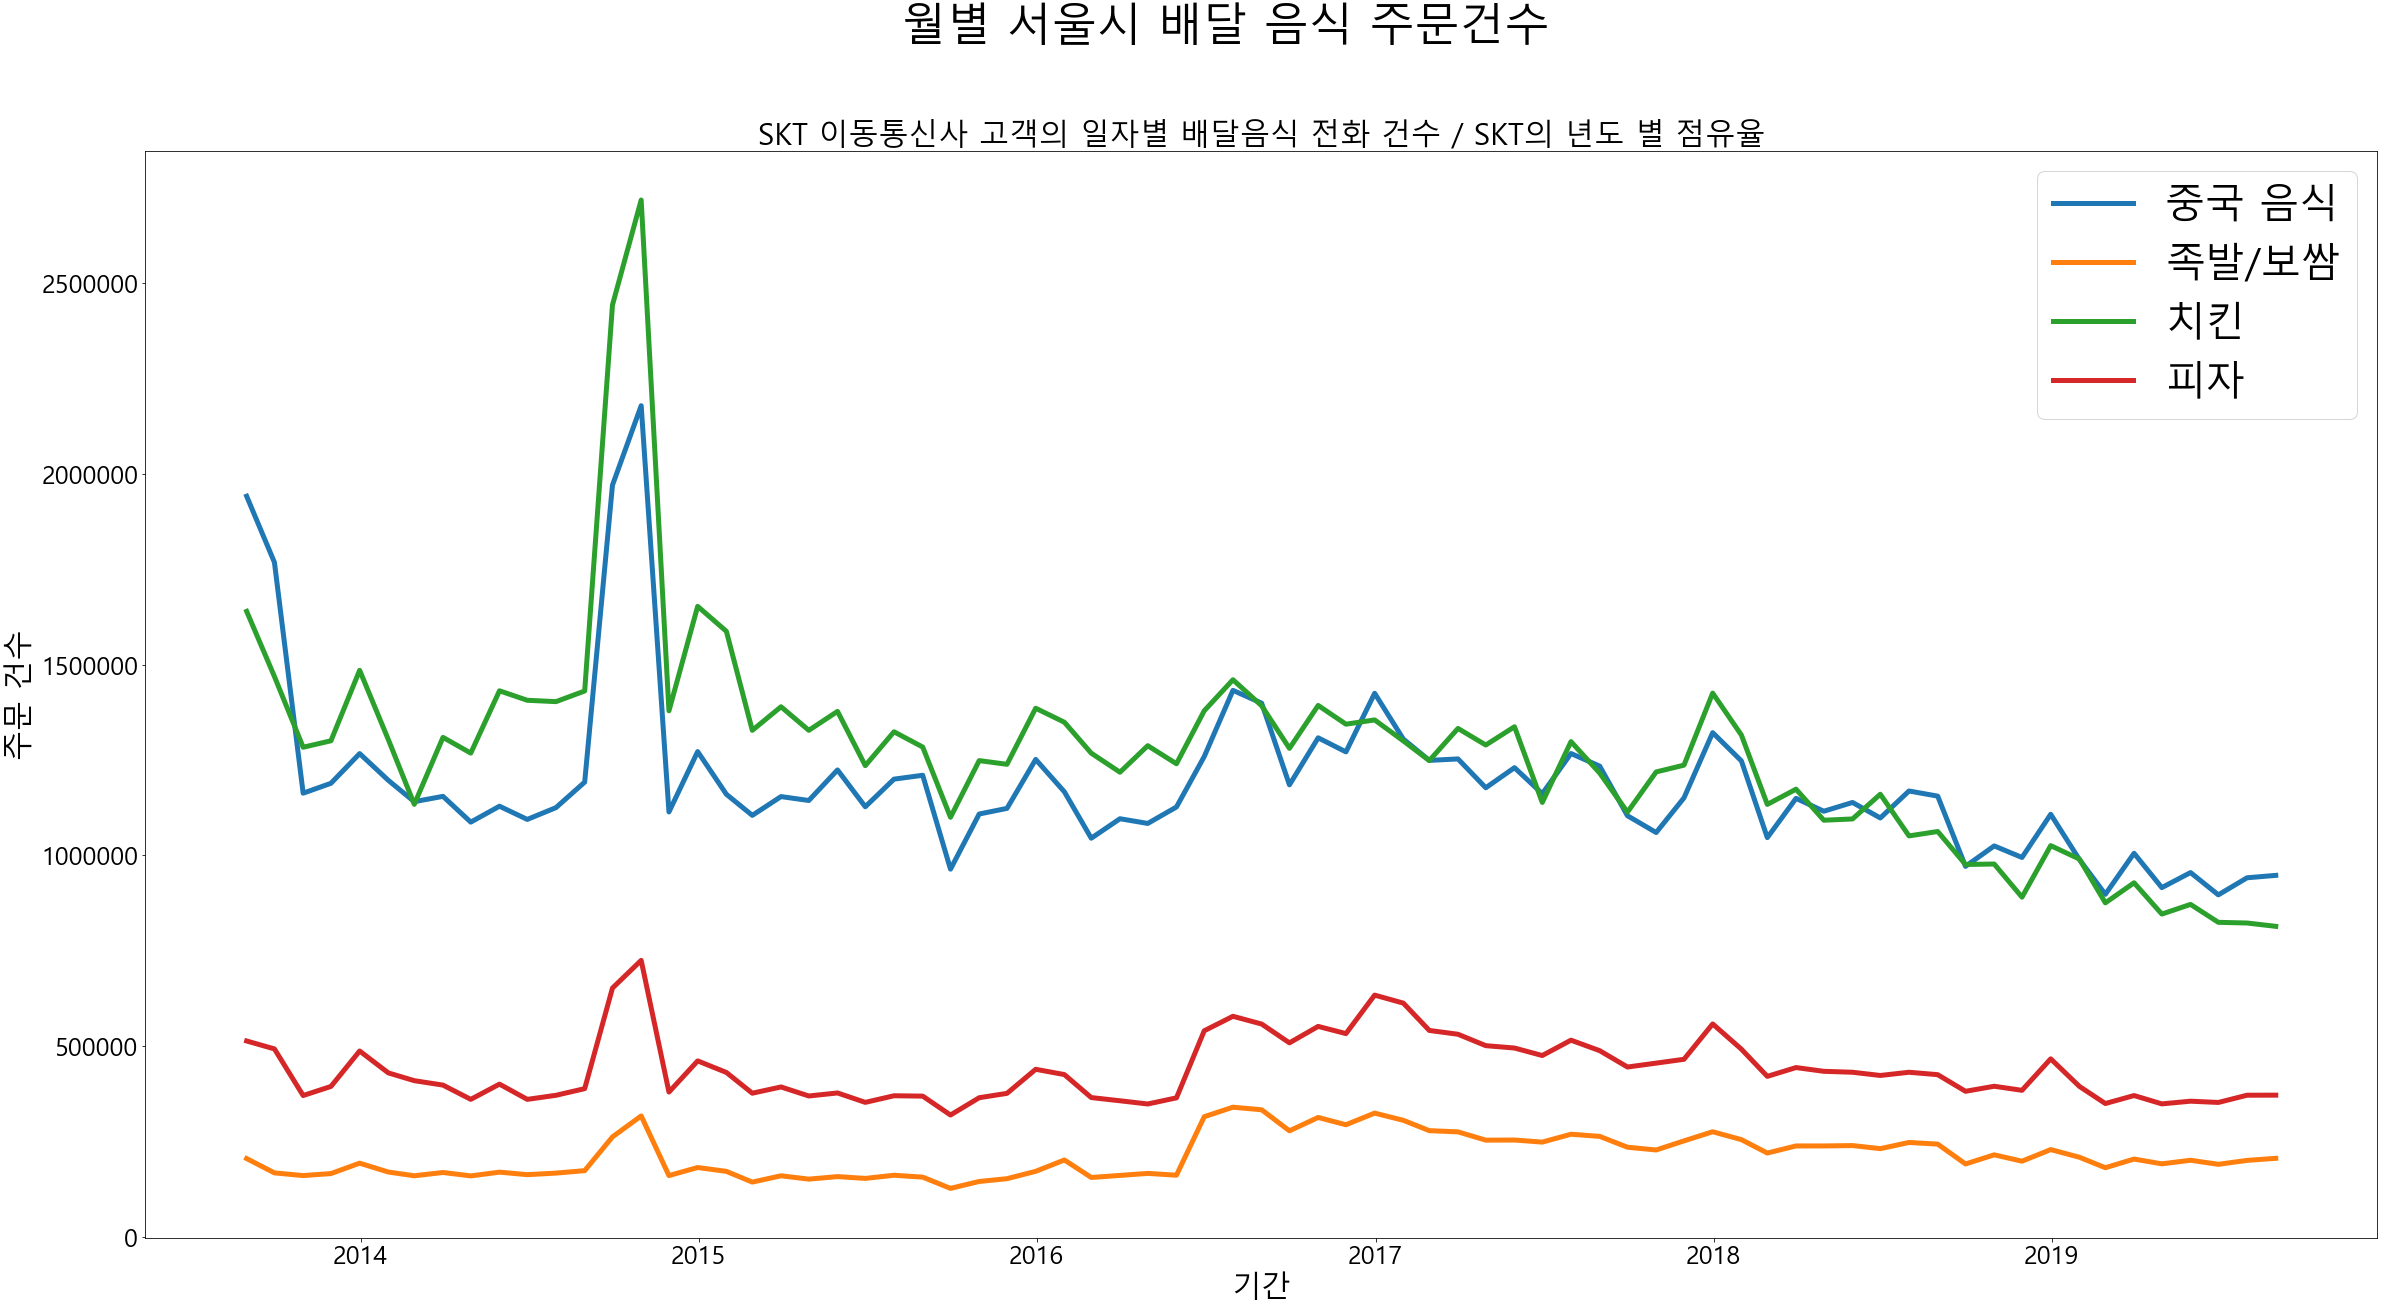

In [17]:
plt.figure(figsize=(40,20))
plt.suptitle("월별 서울시 배달 음식 주문건수", fontsize=45)
plt.title("SKT 이동통신사 고객의 일자별 배달음식 전화 건수 / SKT의 년도 별 점유율", fontsize=30)
plt.xlabel("기간", fontsize=30)
plt.ylabel("주문 건수", fontsize=30)
plt.plot(monthly['중국음식'],lw=5,label='중국 음식')
plt.plot(monthly['족발/보쌈'],lw=5,label='족발/보쌈')
plt.plot(monthly['치킨'],lw=5,label='치킨')
plt.plot(monthly['피자'],lw=5,label='피자')
plt.tick_params(axis='both', labelsize=25)
plt.legend(loc=1, prop={'size': 40})
plt.show()